In [1]:


# maths library for matrix manipulation
import numpy as np

# matplotlib is a library for plotting things inside Python
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# This is a library for reading and writing image files

from skimage import io

In [3]:
# a library for finding files


import glob 

In [159]:
JPGList = glob.glob('../ImageData/TeodoraImages/*/*.jpg')



In [160]:
len(JPGList)

28

In [161]:
allList = JPGList 

In [162]:
# allList is the list of all image file names

len(allList)

28

In [166]:
allList[13]   

'../ImageData/TeodoraImages/Ktitorii-Founders/sopochani2.jpg'

In [167]:
io.imread(    allList[13]     ) 

array([[[141, 178, 220],
        [127, 165, 202],
        [139, 175, 207],
        ...,
        [123, 139, 173],
        [136, 160, 194],
        [132, 161, 195]],

       [[129, 163, 201],
        [128, 162, 197],
        [137, 172, 202],
        ...,
        [116, 131, 164],
        [127, 150, 184],
        [124, 153, 187]],

       [[124, 154, 190],
        [130, 161, 192],
        [134, 165, 193],
        ...,
        [115, 128, 162],
        [127, 147, 182],
        [127, 151, 187]],

       ...,

       [[118,  94, 108],
        [104,  76,  91],
        [101,  66,  86],
        ...,
        [141, 157, 172],
        [145, 161, 176],
        [143, 160, 176]],

       [[105,  81,  95],
        [ 94,  66,  81],
        [ 99,  65,  82],
        ...,
        [149, 168, 183],
        [148, 167, 184],
        [147, 166, 183]],

       [[105,  74,  82],
        [ 99,  67,  80],
        [102,  69,  86],
        ...,
        [149, 163, 174],
        [149, 167, 181],
        [149, 168, 185]]

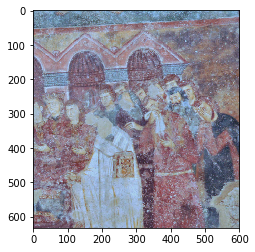

In [168]:
plt.imshow(     io.imread(    allList[13]     )     ) 

In [171]:
Im = io.imread( allList[13] )

In [172]:
from skimage import feature

In [173]:
from skimage import transform

In [174]:
Imr = transform.resize(Im,(256,256))

/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [175]:
F = feature.hog(Imr,  pixels_per_cell=(16,16)  )

/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [176]:
import tqdm

In [177]:
allImages = []

for fileName in tqdm.tqdm(allList):
    im = io.imread(fileName)
    imr = transform.resize(im,(256,256))
    allImages.append(imr)
    

  0%|          | 0/28 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|██████████| 28/28 [00:01<00:00, 25.47it/s]


In [178]:
imageFeatures = []
for image in tqdm.tqdm(allImages):
    F = feature.hog(image,  pixels_per_cell=(16,16)  )
    imageFeatures.append(F)
    

  0%|          | 0/28 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
100%|██████████| 28/28 [00:00<00:00, 43.32it/s]


In [179]:
from scipy.spatial import distance

In [180]:
imf = np.asarray(imageFeatures)
mydistances = distance.squareform(distance.pdist(imf))

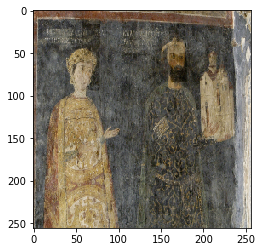

In [181]:
search_im = 3
plt.imshow(allImages[search_im])

In [182]:
# plt.figure(figsize=(15,15))
# idx = np.argsort(mydistances[search_im,:])
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.imshow( allImages[idx[i]])
    

In [185]:
allImageSections = []

for fileName in tqdm.tqdm(allList):
    im = io.imread(fileName)
    
    for j in range(100):
        myshape = np.shape(im)
        w = myshape[0]
        h = myshape[1]
        size = np.random.randint(low=50,high=150)
        minw = np.random.randint(w - size)
        maxw = np.random.randint(h - size)

        newim = im[minw:minw+size,maxw:maxw+size,:]
        imr = transform.resize(newim,(256,256))
        allImageSections.append(imr)
    

  0%|          | 0/28 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|██████████| 28/28 [00:22<00:00,  1.26it/s]


In [ ]:
from sklearn import decomposition

In [186]:
imageFeatureSections = []
for image in tqdm.tqdm(allImageSections):
    F = feature.hog(image,  pixels_per_cell=(16,16)  )
    imageFeatureSections.append(F)
    

  0%|          | 0/2800 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
100%|██████████| 2800/2800 [00:46<00:00, 59.94it/s]


In [ ]:
imf = np.asarray(imageFeatureSections)

In [242]:
mypca = decomposition.PCA(n_components=50)

In [243]:
imf_pca = mypca.fit_transform(imf)

In [244]:
np.shape(imf_pca)

(2800, 50)

In [245]:
mydistances = distance.squareform(distance.pdist(imf_pca))

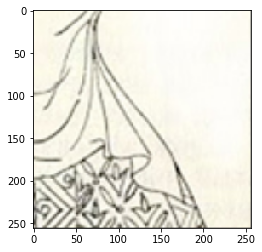

In [246]:
search_im = 435
plt.imshow(allImageSections[search_im])

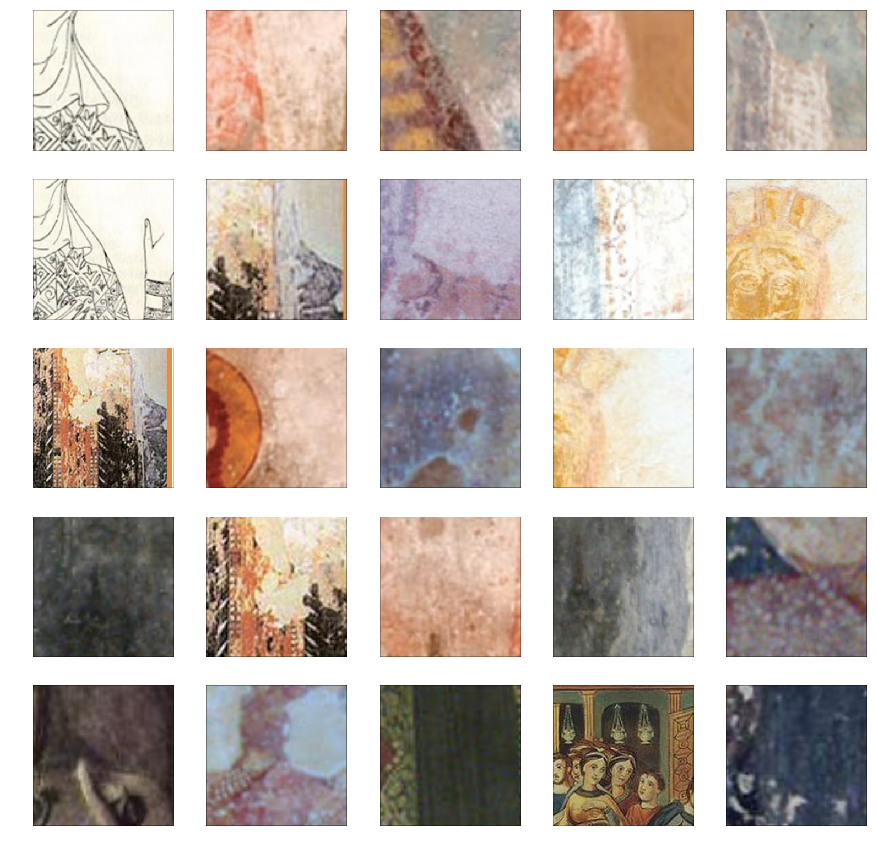

In [247]:
plt.figure(figsize=(15,15))
idx = np.argsort(mydistances[search_im,:])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( allImageSections[idx[i]])
    plt.axis('off')

In [248]:
testIm = allImages[3]

<IPython.core.display.Javascript object>


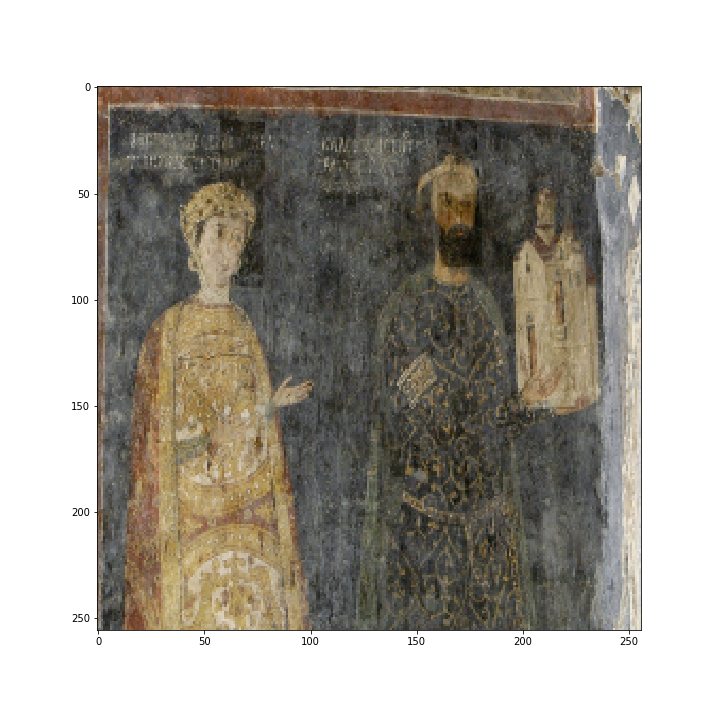

In [231]:
%matplotlib nbagg
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(allImages[3])
coords = []
def onclick(event):
    coords.append( [event.xdata, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [249]:
xmin = int(coords[0][0])
ymin = int(coords[0][1])
xmax = int(coords[1][0])
ymax = int(coords[1][1])

In [250]:
[xmin, xmax, ymin, ymax]

[71, 106, 123, 159]

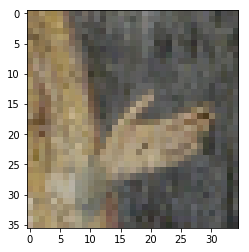

In [251]:
%matplotlib inline
plt.imshow(testIm[ymin:ymax,xmin:xmax,:])

In [252]:
queryIm = testIm[ymin:ymax,xmin:xmax,:]
queryF = feature.hog(image,  pixels_per_cell=(16,16)  )

/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [253]:
np.shape(queryF.reshape(1,-1))

(1, 15876)

In [254]:
np.shape(imf)

(2800, 15876)

In [260]:
# querydistances = distance.cdist(imf,queryF.reshape(1,-1))
qf_pca = mypca.transform(queryF.reshape(1,-1))
querydistances = distance.cdist(imf_pca,qf_pca)

In [261]:
np.shape(imf)

(2800, 15876)

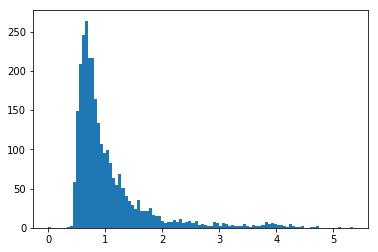

In [262]:
plt.hist(querydistances,100);

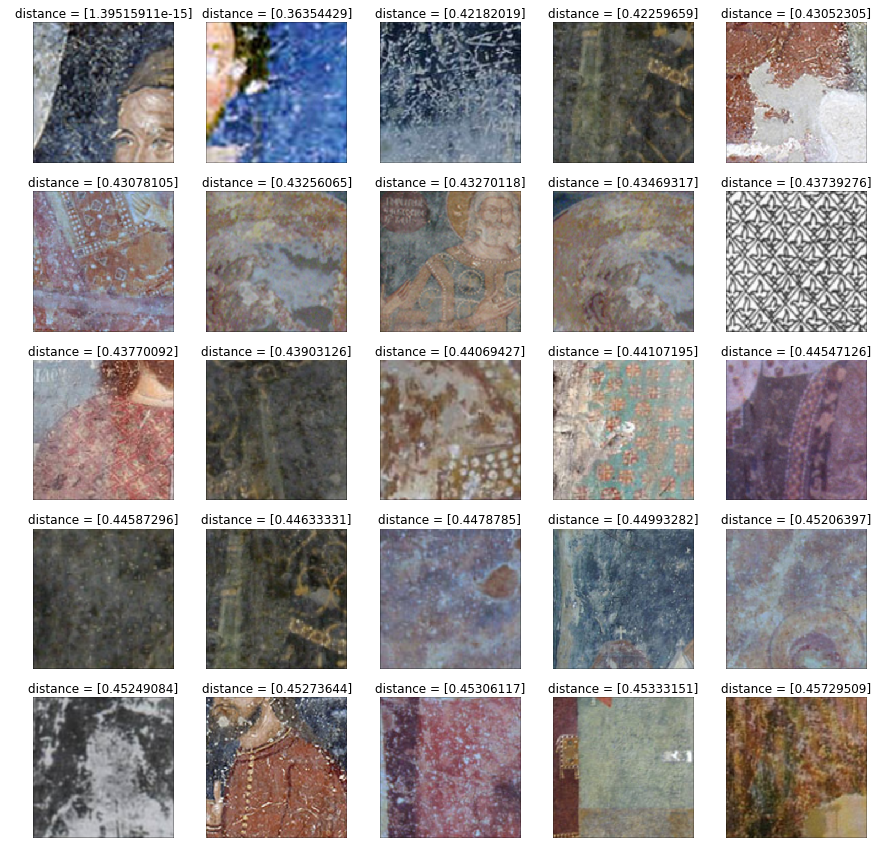

In [263]:
plt.figure(figsize=(15,15))
idx = np.argsort(querydistances,axis=0)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( allImageSections[idx[i][0]])
    plt.axis('off')
    plt.title('distance = ' + str(querydistances[idx[i][0]]))

In [17]:
imageFeatures = []
for fileName in tqdm.tqdm(allList):
    im = io.imread(fileName)
    imr = transform.resize(im,(256,256))
    F = feature.hog(imr,  pixels_per_cell=(16,16)  )
    imageFeatures.append(F)
    

  0%|          | 0/287 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
100%|██████████| 287/287 [00:15<00:00, 18.57it/s]


In [18]:
imf = np.asarray(imageFeatures)

In [19]:
np.shape(imf)

(287, 15876)

In [20]:
from sklearn import manifold

In [21]:
xy = manifold.TSNE(n_components=2).fit_transform(imf)

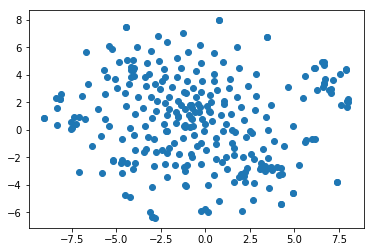

In [22]:
plt.scatter(xy[:,0],xy[:,1])

In [23]:
np.shape(xy)

(287, 2)

In [24]:
xy[:,1]

array([-6.00316405e-01, -7.94239402e-01, -4.72682667e+00,  3.15416312e+00,
        4.94370270e+00, -1.09557115e-01,  9.44425225e-01, -3.44097543e+00,
        1.69507945e+00,  4.41449594e+00,  4.27350998e+00, -4.24774456e+00,
        1.48467684e+00,  4.36751890e+00,  2.04668188e+00,  4.26331460e-01,
       -3.58776510e-01,  3.53286433e+00,  2.69263148e-01, -1.30683744e+00,
        3.05998898e+00,  1.57768154e+00,  4.49381113e+00,  7.96637177e-01,
        3.12388992e+00, -3.05709529e+00,  3.81348252e+00,  2.42975831e+00,
        7.71499157e-01, -6.35348797e+00, -3.12368083e+00,  6.07602692e+00,
        6.18823957e+00, -5.38191652e+00,  4.47339869e+00,  6.77637959e+00,
        3.65352082e+00,  2.10235095e+00,  2.49754405e+00, -1.86327040e+00,
       -3.30993009e+00,  2.12998176e+00,  3.00800234e-01, -3.41707826e+00,
        1.08731735e+00, -2.40173411e+00,  4.94229984e+00,  6.76097965e+00,
        2.24518895e+00,  8.32510471e-01, -2.43316722e+00, -2.00497532e+00,
        3.93362260e+00, -

In [25]:
myCanvas = np.zeros(( 5000,5000,3  ))

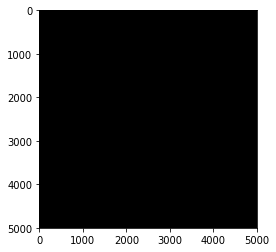

In [26]:
plt.imshow(myCanvas)

In [27]:
x = xy[:,0].copy()
y = xy[:,1].copy()

# normalise the x values to be between -1 and +1:
x *= (1/np.max(  abs(x)   )) 
# shift them so they are between 0 and 2
x += 1
x *= 2300

y *= (1/np.max(  abs(y)   )) 
y += 1
y *= 2300

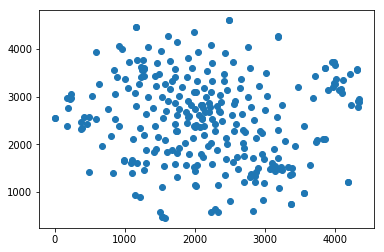

In [28]:
plt.scatter(x,y)

In [29]:
for i in tqdm.tqdm(range ( len ( allList ))):
    px = int(x[i])
    py = int(y[i])
    
    imr = transform.resize( io.imread( allList[i] ) , (128,128,3))
    myCanvas[px:px+128,py:py+128] = imr

  0%|          | 0/287 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|██████████| 287/287 [00:05<00:00, 51.11it/s]


In [30]:
io.imsave('testOutput.jpg',myCanvas)

/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
